In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\pulla\Downloads\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
cat_features = df.select_dtypes(include = 'object').columns
num_features = df.select_dtypes(include = ['int', 'float']).columns

In [10]:
cat_features.values

array(['sex', 'smoker', 'region'], dtype=object)

In [11]:
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [13]:
for i in cat_features:
    print(df[i].value_counts())
    print('\n'+'-'*50)

sex
male      676
female    662
Name: count, dtype: int64

--------------------------------------------------
smoker
no     1064
yes     274
Name: count, dtype: int64

--------------------------------------------------
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

--------------------------------------------------


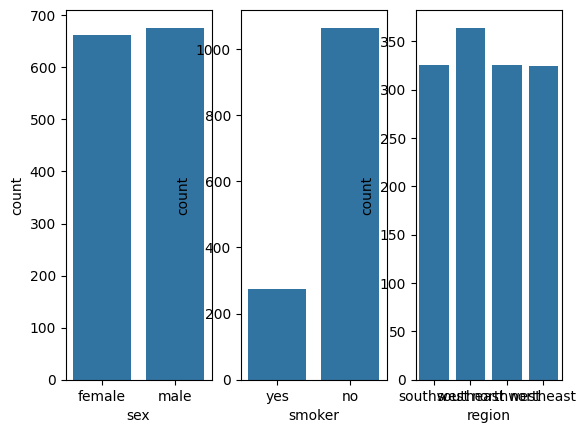

In [14]:
fig, ax = plt.subplots(nrows= int(np.ceil(len(cat_features) / 3)), ncols = 3)
ax = ax.flatten()
for i, column in enumerate(cat_features):
    sns.countplot(df, x = df[column], ax = ax[i])

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])
df['region'] = encoder.fit_transform(df['region'])

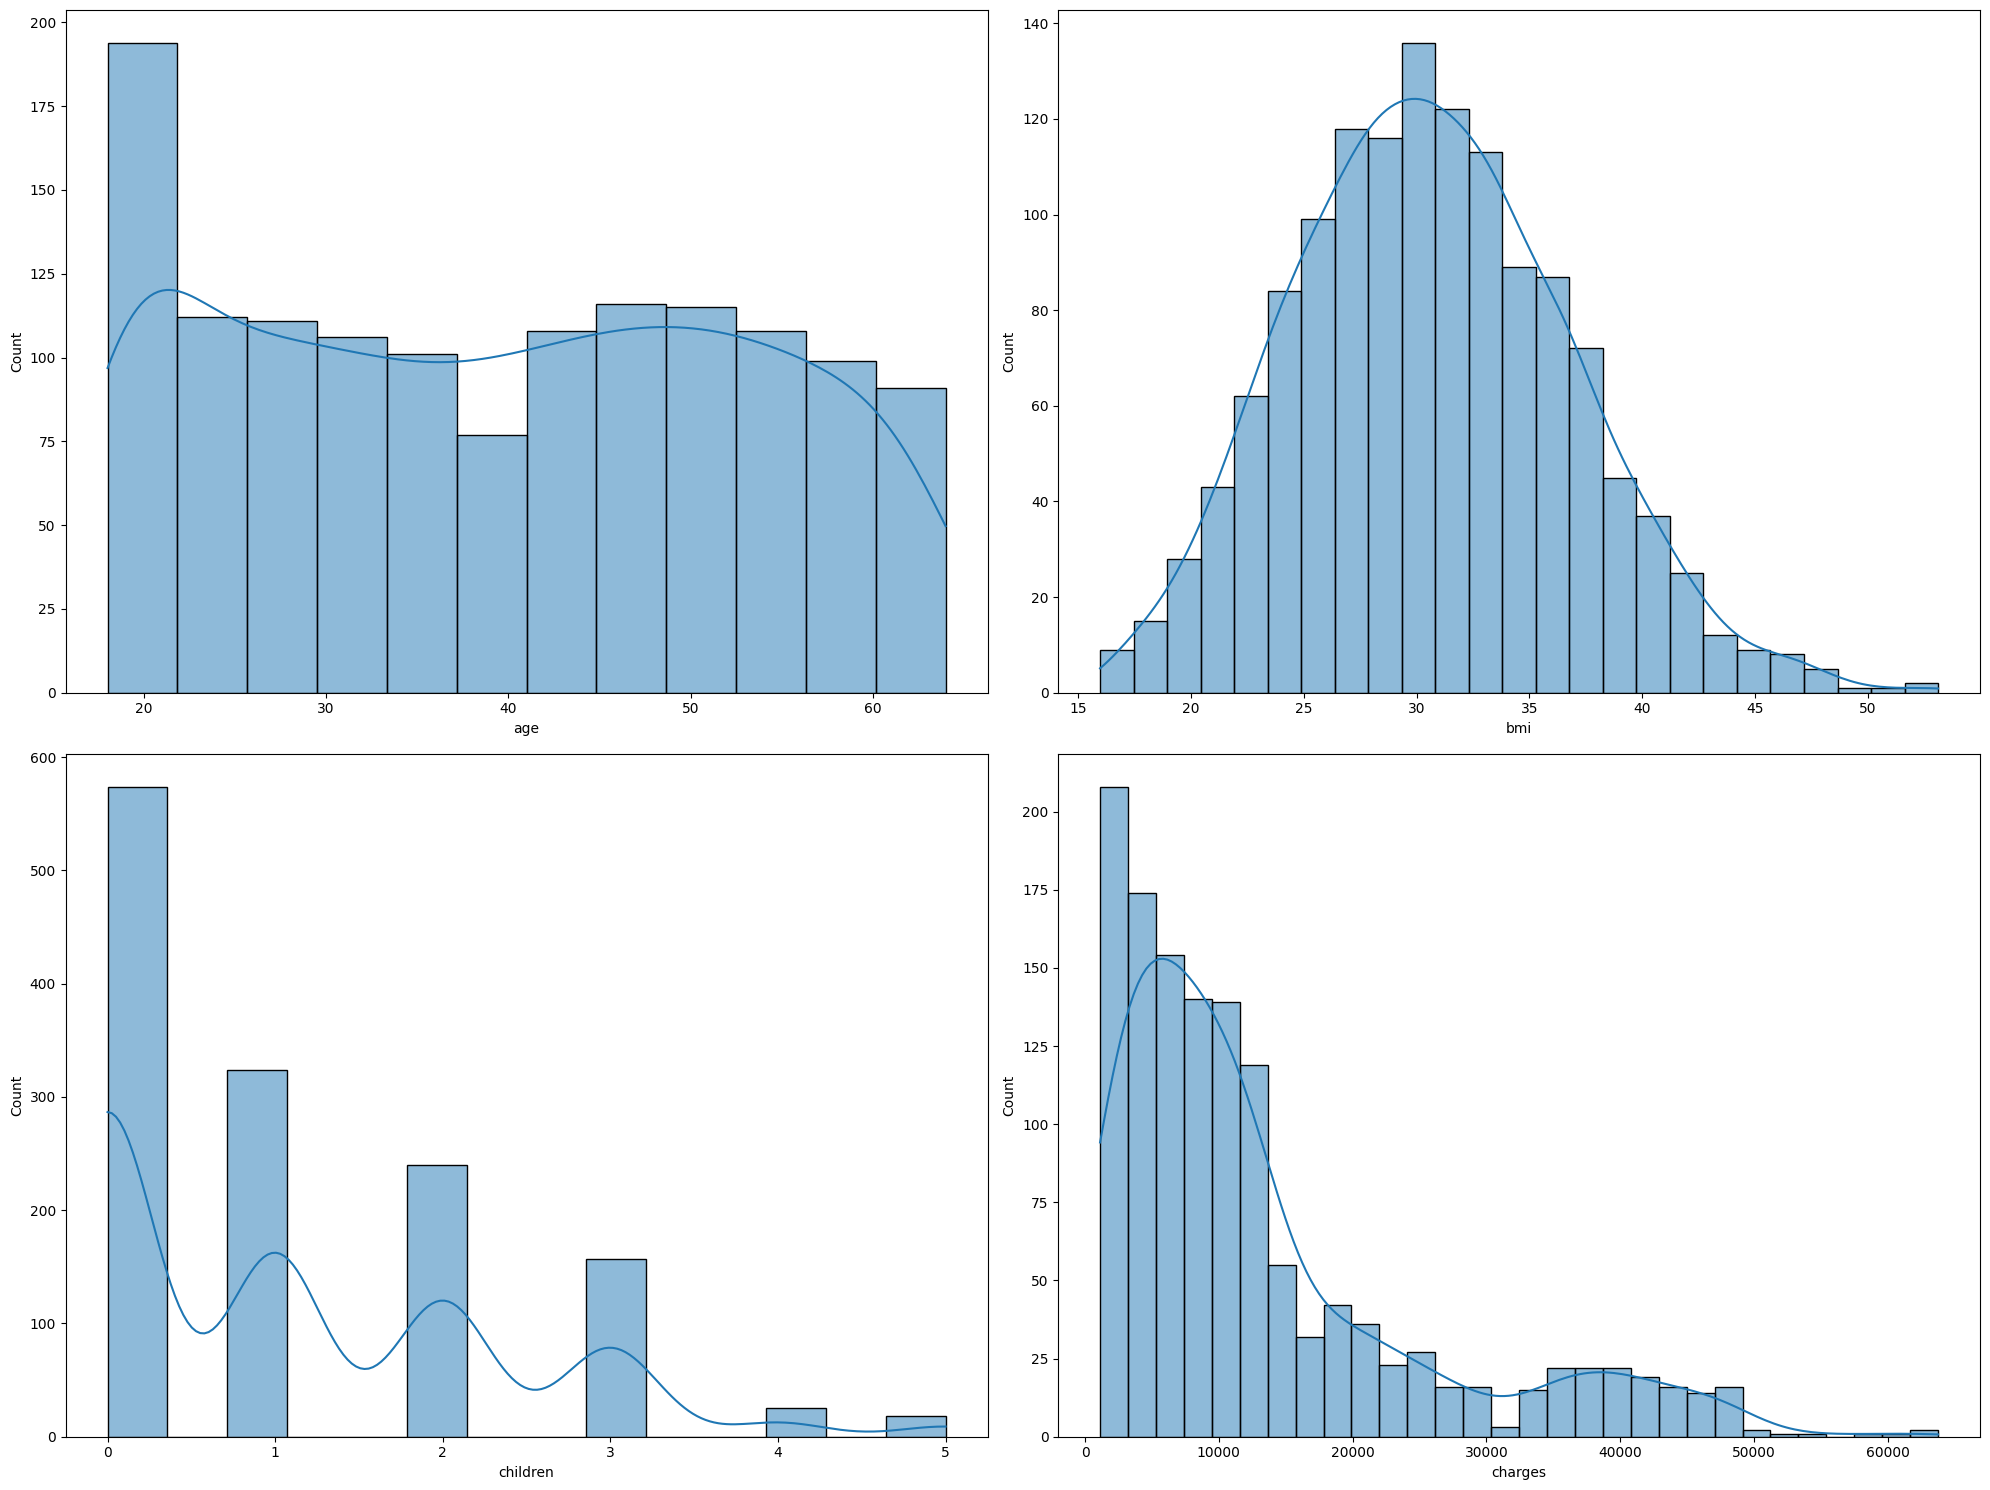

In [16]:
fig, axes = plt.subplots( nrows = 2, ncols=2, figsize = (20,15))
axes = axes.flatten()
for i, column in enumerate(num_features):
    ax = axes[i]
    sns.histplot(df[column], kde=True, ax=ax)
plt.tight_layout()
plt.show()

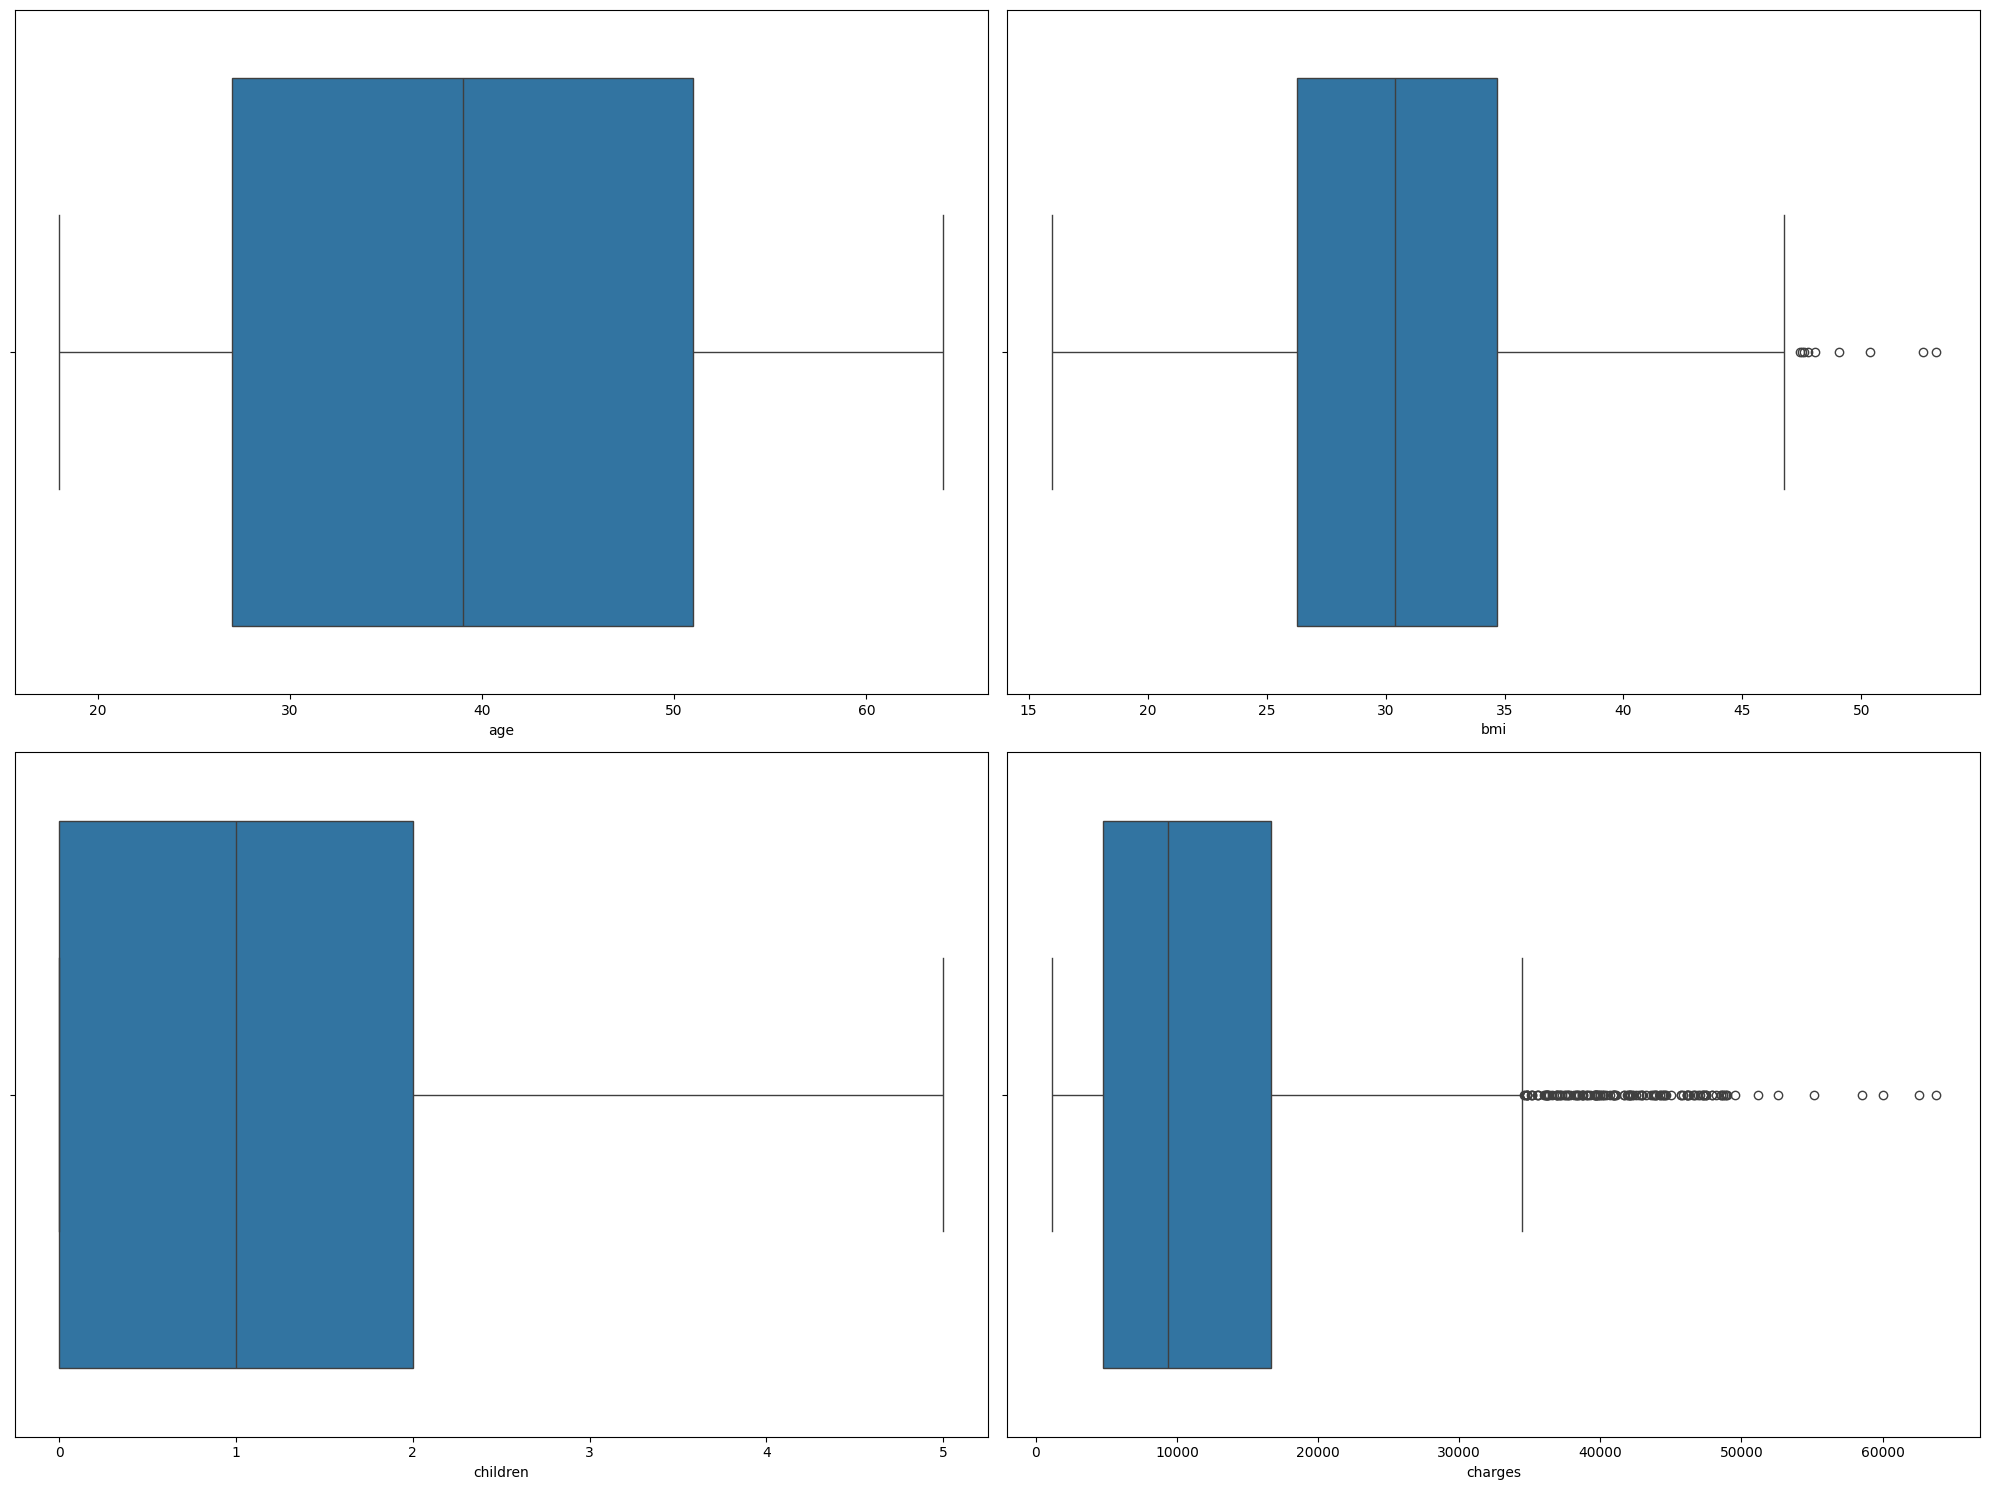

In [17]:
fig, axes = plt.subplots( nrows= 2, ncols=2, figsize = (20,15))
axes = axes.flatten()
for i, column in enumerate(num_features):
    ax = axes[i]
    sns.boxplot(data = df, x = df[column], ax=ax)
plt.tight_layout()
plt.show()

<Axes: >

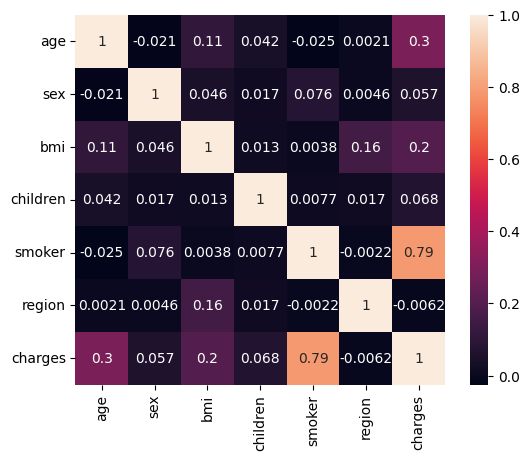

In [18]:
f, ax = plt.subplots()
corr = df.corr()
sns.heatmap(corr, annot = True, square=True, ax=ax)

C:\Users\pulla\AppData\Local\Temp\ipykernel_20936\4277502059.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.smoker == 1]["charges"], ax = ax[0])
C:\Users\pulla\AppData\Local\Temp\ipykernel_20936\4277502059.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.smoker == 0]["charges

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

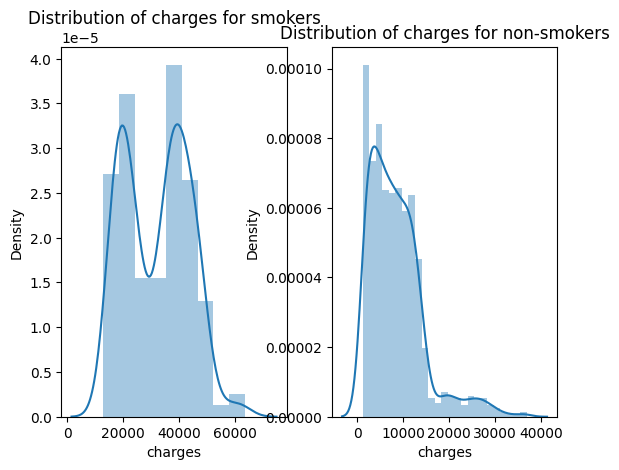

In [22]:
fig, axis = plt.subplots(nrows = 1, ncols = 2)
ax = axis.flatten()
sns.distplot(df[df.smoker == 1]["charges"], ax = ax[0])
ax[0].set_title("Distribution of charges for smokers")
sns.distplot(df[df.smoker == 0]["charges"], ax = ax[1])
ax[1].set_title("Distribution of charges for non-smokers")

<Axes: xlabel='smoker', ylabel='count'>

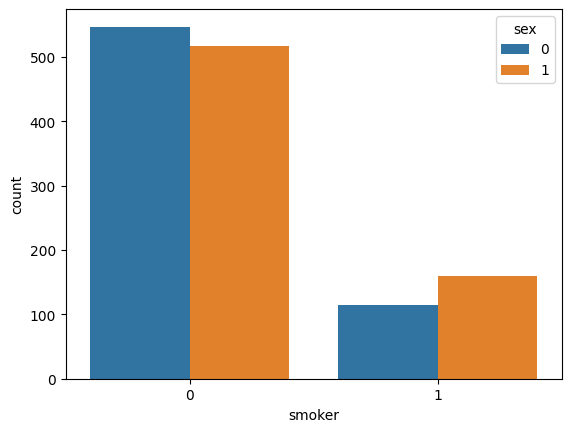

In [23]:
sns.countplot(data = df, x = 'smoker', hue = 'sex')

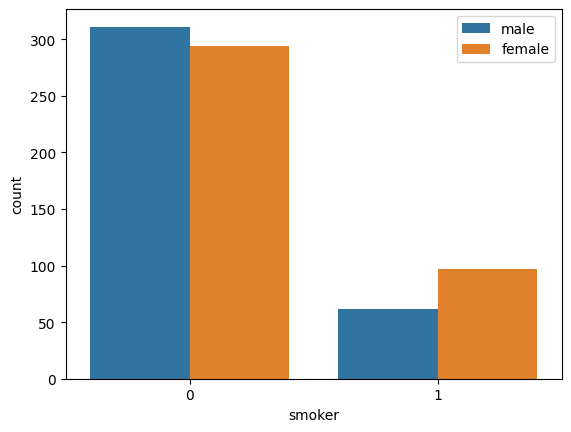

In [24]:
sns.countplot(data = df[df["children"] > 0], x = "smoker", hue = "sex" )
plt.legend({"male", "female"})